In [20]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from joblib import dump, load
import matplotlib.pyplot as plt

## 1. Preprocessing

1. Read the file `dayofweek.csv` to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`.
3. Using, for example, `value_counts()` to check if the distribution of classes is similar in train and test.
4. Use the additional parameter `stratify=` and check the distribution again, now it should be more or less similar in both datasets.

In [21]:
df = pd.read_csv('../data/dayofweek.csv')
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X,                     
    y,                     
    test_size=0.2,          
    random_state=21,        
)

In [24]:
for column in X_train.columns:
     print(X_train[column].value_counts(normalize=True).head()) 

numTrials
-0.788667    0.100148
-0.756764    0.071217
-0.724861    0.058605
-0.692958    0.049703
-0.597248    0.039318
Name: proportion, dtype: float64
hour
 1.179231    0.109050
 0.711533    0.096439
 0.945382    0.089763
 0.243835    0.082344
-0.223863    0.075668
Name: proportion, dtype: float64
uid_user_0
0.0    0.998516
1.0    0.001484
Name: proportion, dtype: float64
uid_user_1
0.0    0.974036
1.0    0.025964
Name: proportion, dtype: float64
uid_user_10
0.0    0.956973
1.0    0.043027
Name: proportion, dtype: float64
uid_user_11
0.0    0.997033
1.0    0.002967
Name: proportion, dtype: float64
uid_user_12
0.0    0.970326
1.0    0.029674
Name: proportion, dtype: float64
uid_user_13
0.0    0.96365
1.0    0.03635
Name: proportion, dtype: float64
uid_user_14
0.0    0.923591
1.0    0.076409
Name: proportion, dtype: float64
uid_user_15
0.0    0.991098
1.0    0.008902
Name: proportion, dtype: float64
uid_user_16
0.0    0.98368
1.0    0.01632
Name: proportion, dtype: float64
uid_user_17


In [25]:
for column in X_test.columns:
     print(X_train[column].value_counts(normalize=True).head()) 

numTrials
-0.788667    0.100148
-0.756764    0.071217
-0.724861    0.058605
-0.692958    0.049703
-0.597248    0.039318
Name: proportion, dtype: float64
hour
 1.179231    0.109050
 0.711533    0.096439
 0.945382    0.089763
 0.243835    0.082344
-0.223863    0.075668
Name: proportion, dtype: float64
uid_user_0
0.0    0.998516
1.0    0.001484
Name: proportion, dtype: float64
uid_user_1
0.0    0.974036
1.0    0.025964
Name: proportion, dtype: float64
uid_user_10
0.0    0.956973
1.0    0.043027
Name: proportion, dtype: float64
uid_user_11
0.0    0.997033
1.0    0.002967
Name: proportion, dtype: float64
uid_user_12
0.0    0.970326
1.0    0.029674
Name: proportion, dtype: float64
uid_user_13
0.0    0.96365
1.0    0.03635
Name: proportion, dtype: float64
uid_user_14
0.0    0.923591
1.0    0.076409
Name: proportion, dtype: float64
uid_user_15
0.0    0.991098
1.0    0.008902
Name: proportion, dtype: float64
uid_user_16
0.0    0.98368
1.0    0.01632
Name: proportion, dtype: float64
uid_user_17


In [26]:
print(y_train.value_counts(normalize=True).head()) 

dayofweek
3    0.232196
6    0.212908
1    0.164688
5    0.160237
2    0.092730
Name: proportion, dtype: float64


In [27]:
print(y_test.value_counts(normalize=True).head()) 

dayofweek
3    0.245562
6    0.204142
5    0.162722
1    0.153846
0    0.091716
Name: proportion, dtype: float64


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X,                     
    y,                     
    test_size=0.2,          
    random_state=21,
    stratify=y        
)

In [29]:
for column in X_train.columns:
     print(X_train[column].value_counts(normalize=True).head()) 

numTrials
-0.788667    0.091988
-0.756764    0.074926
-0.724861    0.061573
-0.692958    0.049703
-0.661055    0.040059
Name: proportion, dtype: float64
hour
 1.179231    0.117953
 0.711533    0.100148
 0.945382    0.092730
-0.223863    0.075668
 0.243835    0.073442
Name: proportion, dtype: float64
uid_user_0
0.0    0.998516
1.0    0.001484
Name: proportion, dtype: float64
uid_user_1
0.0    0.972552
1.0    0.027448
Name: proportion, dtype: float64
uid_user_10
0.0    0.956231
1.0    0.043769
Name: proportion, dtype: float64
uid_user_11
0.0    0.996291
1.0    0.003709
Name: proportion, dtype: float64
uid_user_12
0.0    0.972552
1.0    0.027448
Name: proportion, dtype: float64
uid_user_13
0.0    0.968101
1.0    0.031899
Name: proportion, dtype: float64
uid_user_14
0.0    0.925074
1.0    0.074926
Name: proportion, dtype: float64
uid_user_15
0.0    0.988872
1.0    0.011128
Name: proportion, dtype: float64
uid_user_16
0.0    0.97997
1.0    0.02003
Name: proportion, dtype: float64
uid_user_1

In [30]:
for column in X_test.columns:
     print(X_train[column].value_counts(normalize=True).head()) 

numTrials
-0.788667    0.091988
-0.756764    0.074926
-0.724861    0.061573
-0.692958    0.049703
-0.661055    0.040059
Name: proportion, dtype: float64
hour
 1.179231    0.117953
 0.711533    0.100148
 0.945382    0.092730
-0.223863    0.075668
 0.243835    0.073442
Name: proportion, dtype: float64
uid_user_0
0.0    0.998516
1.0    0.001484
Name: proportion, dtype: float64
uid_user_1
0.0    0.972552
1.0    0.027448
Name: proportion, dtype: float64
uid_user_10
0.0    0.956231
1.0    0.043769
Name: proportion, dtype: float64
uid_user_11
0.0    0.996291
1.0    0.003709
Name: proportion, dtype: float64
uid_user_12
0.0    0.972552
1.0    0.027448
Name: proportion, dtype: float64
uid_user_13
0.0    0.968101
1.0    0.031899
Name: proportion, dtype: float64
uid_user_14
0.0    0.925074
1.0    0.074926
Name: proportion, dtype: float64
uid_user_15
0.0    0.988872
1.0    0.011128
Name: proportion, dtype: float64
uid_user_16
0.0    0.97997
1.0    0.02003
Name: proportion, dtype: float64
uid_user_1

In [31]:
print(y_train.value_counts(normalize=True).head()) 

dayofweek
3    0.234421
6    0.211424
1    0.162463
5    0.160979
2    0.088279
Name: proportion, dtype: float64


In [32]:
print(y_test.value_counts(normalize=True).head()) 

dayofweek
3    0.236686
6    0.210059
1    0.162722
5    0.159763
2    0.088757
Name: proportion, dtype: float64


## 2. Baseline models

1. Train exactly the same baseline models from the previous exercise and calculate the accuracies using the test dataset with stratification.
2. Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

### a. Logreg

In [33]:
df = pd.read_csv('../data/dayofweek.csv')
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']

In [34]:
base_logreg = LogisticRegression(random_state=21, fit_intercept=False)
base_logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [35]:
y_pred_logreg = base_logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy: {accuracy_logreg}\nPrev Accuracy: 0.6209964412811388\nDiff: −0,0056')

Accuracy: 0.6331360946745562
Prev Accuracy: 0.6209964412811388
Diff: −0,0056


### b. SVM

In [36]:
svm = SVC(kernel='linear', random_state=21)
svm.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [37]:
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy_svm}\nPrev Accuracy: 0.702846975088968\nDiff: 0,013')

Accuracy: 0.7159763313609467
Prev Accuracy: 0.702846975088968
Diff: 0,013


### c. Decision tree

In [38]:
tree = DecisionTreeClassifier(random_state=21)
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,21
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [39]:
y_pred_tree = tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy: {accuracy_tree}\nPrev Accuracy: 0.6637010676156584\nDiff: 0,209')

Accuracy: 0.8727810650887574
Prev Accuracy: 0.6637010676156584
Diff: 0,209


### d. Random forest

In [40]:
rf = RandomForestClassifier(max_depth=4, random_state=21)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_rf}\nPrev Accuracy: 1.0\nDiff: −0,4704')

Accuracy: 0.5295857988165681
Prev Accuracy: 1.0
Diff: −0,4704


## 3. Crossvalidation

1. Using `cross_val_score` with `cv=10` calculate the mean accuracy and standard deviation for every model that you used before (logreg with `solver='liblinear'`, SVC, decision tree, random forest).

### a. Logreg

In [41]:
base_logreg = LogisticRegression(random_state=21, fit_intercept=False, max_iter=100)
logreg = OneVsRestClassifier(base_logreg)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

In [42]:
 scores = cross_val_score(
        estimator=base_logreg,
        X=X_test,
        y=y_test,
        cv=10
 )
mean_score = scores.mean()
mean_score

np.float64(0.5827985739750446)

### b. SVM

In [43]:
svm = SVC(kernel='linear', random_state=21)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [44]:
scores = cross_val_score(
        estimator=svm,
        X=X_test,
        y=y_test,
        cv=10
 )
mean_score = scores.mean()
mean_score

np.float64(0.618270944741533)

### c. Decision tree

In [45]:
tree = DecisionTreeClassifier(random_state=21)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

In [46]:
scores = cross_val_score(
        estimator=tree,
        X=X_test,
        y=y_test,
        cv=10
 )
mean_score = scores.mean()
mean_score

np.float64(0.739572192513369)

### d. Random forest

In [47]:
rf = RandomForestClassifier(max_depth=4, random_state=21)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [48]:
scores = cross_val_score(
        estimator=rf,
        X=X_test,
        y=y_test,
        cv=10
 )
mean_score = scores.mean()
mean_score

np.float64(0.532620320855615)

## 4. Optimization

1. Choose the best model and play a little bit with the parameters on cross-validation, find a good enough parameter or a combination of the parameters.
2. Calculate the accuracy for the final model on the test dataset.
3. Draw a plot that displays the top-10 most  important features for that model.
4. Save the model using `joblib`.
5. Load the model, make predictions for the test dataset and calculate the accuracy.

In [49]:
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=21, fit_intercept=False),
    'SVC': SVC(random_state=21),
    'Decision Tree': DecisionTreeClassifier(random_state=21),
    'Random Forest': RandomForestClassifier(random_state=21)
}

best_score = 0
best_model_name = None

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)
    mean_score = scores.mean()
    std_score = scores.std()
    print(f"{name}: {mean_score:.4f} (+/- {std_score * 2:.4f})")
    
    if mean_score > best_score:
        best_score = mean_score
        best_model_name = name

print(f"\nЛучшая модель: {best_model_name} с точностью {best_score:.4f}")

Logistic Regression: 0.5816 (+/- 0.0506)
SVC: 0.7833 (+/- 0.0509)
Decision Tree: 0.8857 (+/- 0.0475)
Random Forest: 0.9147 (+/- 0.0347)

Лучшая модель: Random Forest с точностью 0.9147


In [50]:
rf = RandomForestClassifier(random_state=21)

rf.fit(X_train, y_train)

y_pred_test = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
accuracy

0.9378698224852071

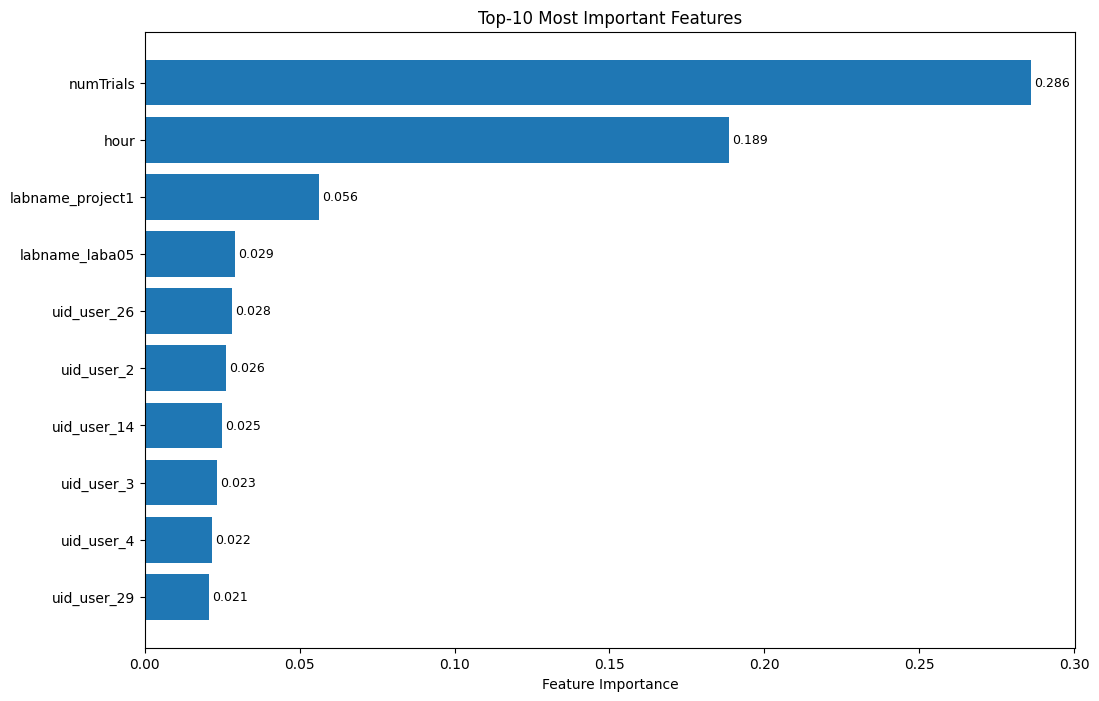

In [51]:
feature_names = X.columns.tolist()
feature_importance = rf.feature_importances_

importance = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
})

top_features = importance.nlargest(10, 'importance')

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title(f'Top-10 Most Important Features')
plt.gca().invert_yaxis()

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
            f'{width:.3f}', ha='left', va='center', fontsize=9)


In [52]:
dump(rf, 'rf.joblib')

['rf.joblib']

In [53]:
new_rf = load('rf.joblib')

In [54]:
prediction = new_rf.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, prediction)
accuracy

0.9378698224852071